In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from IPython.core.pylabtools import figsize

%matplotlib inline
figsize(16, 8)

INCLUDE_TEST_DATA = False

# Load and adjust the data

In [2]:
df_train = pd.read_csv('../data/TableS2_training_hmdb.csv', keep_default_na=False)
df_train = df_train[df_train['Annotation'] == '']

if INCLUDE_TEST_DATA:
    df_test = pd.read_csv('../data/TableS3_training_hmdb.csv', keep_default_na=False)
    df_train = pd.concat([df_train, df_test])

## Available Features

In [3]:
# DataFrame(df_train.columns, columns=['Column'])

In [4]:
features = [u'EXACT_MASS',
            u'ALOGPS_LOGP', u'ALOGPS_LOGS',
            u'MOLECULAR_WEIGHT',
            u'JCHEM_ACCEPTOR_COUNT', u'JCHEM_BASIC_PKA', u'JCHEM_ACIDIC_PKA',
            u'JCHEM_DONOR_COUNT', u'JCHEM_LOGP', u'JCHEM_PHYSIOLOGICAL_CHARGE',
            u'JCHEM_POLARIZABILITY', u'JCHEM_POLAR_SURFACE_AREA',
            u'JCHEM_REFRACTIVITY', u'JCHEM_ROTATABLE_BOND_COUNT']

# Training Data
X_train = df_train[features]
y_train = df_train[['RRF_Measured']]

print("Number of metabolites (training):", len(X_train))

Number of metabolites (training): 34


# Fit PCA

In [5]:
pca = PCA(n_components=3, whiten=True)

pca.fit(X_train)

PCA(copy=True, n_components=3, whiten=True)

In [6]:
print('explained_variance_', pca.explained_variance_)
print('explained_variance_ratio_', pca.explained_variance_ratio_)

DataFrame(pca.components_, columns=features)

explained_variance_ [ 4456.5163001    393.97282037    29.32059053]
explained_variance_ratio_ [ 0.90717851  0.080198    0.00596857]


,EXACT_MASS,ALOGPS_LOGP,ALOGPS_LOGS,MOLECULAR_WEIGHT,JCHEM_ACCEPTOR_COUNT,JCHEM_BASIC_PKA,JCHEM_ACIDIC_PKA,JCHEM_DONOR_COUNT,JCHEM_LOGP,JCHEM_PHYSIOLOGICAL_CHARGE,JCHEM_POLARIZABILITY,JCHEM_POLAR_SURFACE_AREA,JCHEM_REFRACTIVITY,JCHEM_ROTATABLE_BOND_COUNT
0,0.660970,-0.003007,-0.007602,0.661514,0.017052,-0.005765,0.002191,0.009637,-0.005313,-0.000124,0.061501,0.313468,0.151120,0.010898
1,-0.184404,-0.042943,0.021434,-0.185435,0.049011,0.045393,-0.082056,0.025682,-0.039045,-0.008141,-0.058164,0.917425,-0.266029,-0.006098
2,0.122116,0.046541,0.027819,0.127301,-0.019291,0.641901,-0.051507,0.073306,0.128450,0.008922,0.043462,-0.181180,-0.702934,-0.009805


# PCA Transform

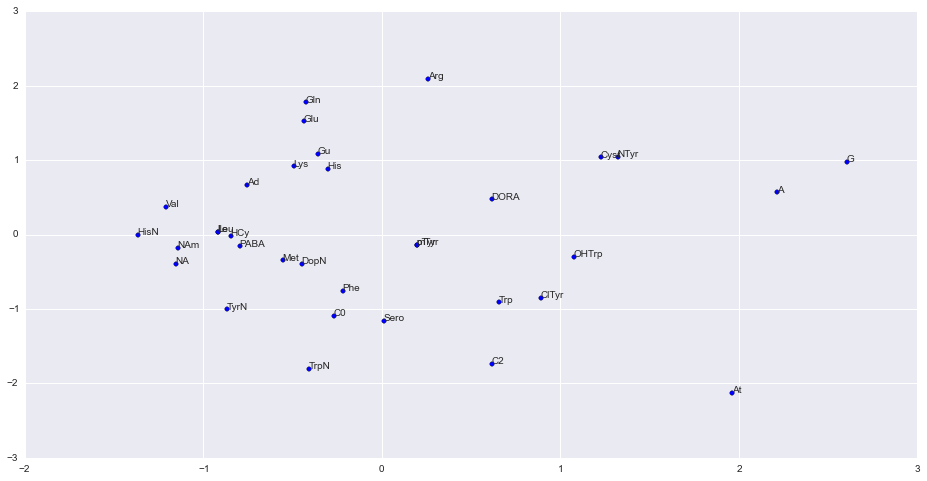

In [7]:
X_train_tr = pca.transform(X_train)

fig, ax = plt.subplots()

plt.scatter(X_train_tr[:, 0], X_train_tr[:, 1])

for x, y, label in zip(X_train_tr[:, 0], X_train_tr[:, 1], df_train['Short Name']):
    ann = ax.annotate(label, (x, y))

plt.grid(True)
plt.show()

# PCA Components

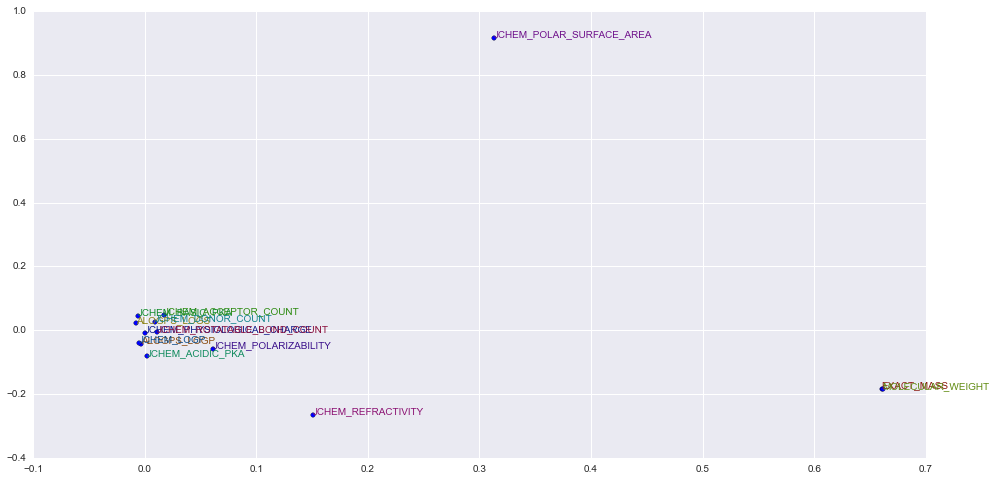

In [8]:
fig, ax = plt.subplots()

plt.scatter(pca.components_[0], pca.components_[1])
colors = sns.hls_palette(len(features), l=.3, s=.8)

for x, y, label, c in zip(pca.components_[0], pca.components_[1], features, colors):
    ann = ax.annotate(label, (x, y), color=c)

plt.grid(True)
plt.show()

# Feature Clusters

In [9]:
X = pca.components_[0]
Y = pca.components_[1]

df = DataFrame({'X': X, 'Y': Y, 'LABEL': features})

In [10]:
N_CLUSTERS = 4

kmeans = KMeans(n_clusters=N_CLUSTERS)
kmeans.fit(df[['X', 'Y']])

clusters = Series(kmeans.predict(df[['X', 'Y']]), name='CLUSTER')
                  
df_grouped_features = pd.concat([df, clusters], axis=1)
df_grouped_features.sort(columns=['CLUSTER'], ascending=True, inplace=True)

df_grouped_features

,LABEL,X,Y,CLUSTER
1,ALOGPS_LOGP,-0.003007,-0.042943,0
2,ALOGPS_LOGS,-0.007602,0.021434,0
4,JCHEM_ACCEPTOR_COUNT,0.017052,0.049011,0
5,JCHEM_BASIC_PKA,-0.005765,0.045393,0
6,JCHEM_ACIDIC_PKA,0.002191,-0.082056,0
7,JCHEM_DONOR_COUNT,0.009637,0.025682,0
8,JCHEM_LOGP,-0.005313,-0.039045,0
9,JCHEM_PHYSIOLOGICAL_CHARGE,-0.000124,-0.008141,0
10,JCHEM_POLARIZABILITY,0.061501,-0.058164,0
13,JCHEM_ROTATABLE_BOND_COUNT,0.010898,-0.006098,0
